# Dynamic Programming Notebook

Based On: [Dynamic Programming - Learn to Solve Algorithmic Problems & Coding Challenges](https://www.youtube.com/watch?v=oBt53YbR9Kk)

Problems optimized
* Fibonacci Sequence
* Grid Traveler Problem
* Can Sum Problem

In [2]:
from time import time

## Fibonacci Sequence

### Recursive Implementation
Takes a long time to run, poor time complexity of 2^n

In [27]:
def fib(n):
    if n <= 2:
        return 1
    
    else:
        return fib(n-1) + fib(n-2)

s = time()    
op = fib(40)
e = time()

print(f"{op}, time taken:{e-s}s")

102334155, time taken:5.2787840366363525s



This is because when visualized, each subtree is calculated multiple times.

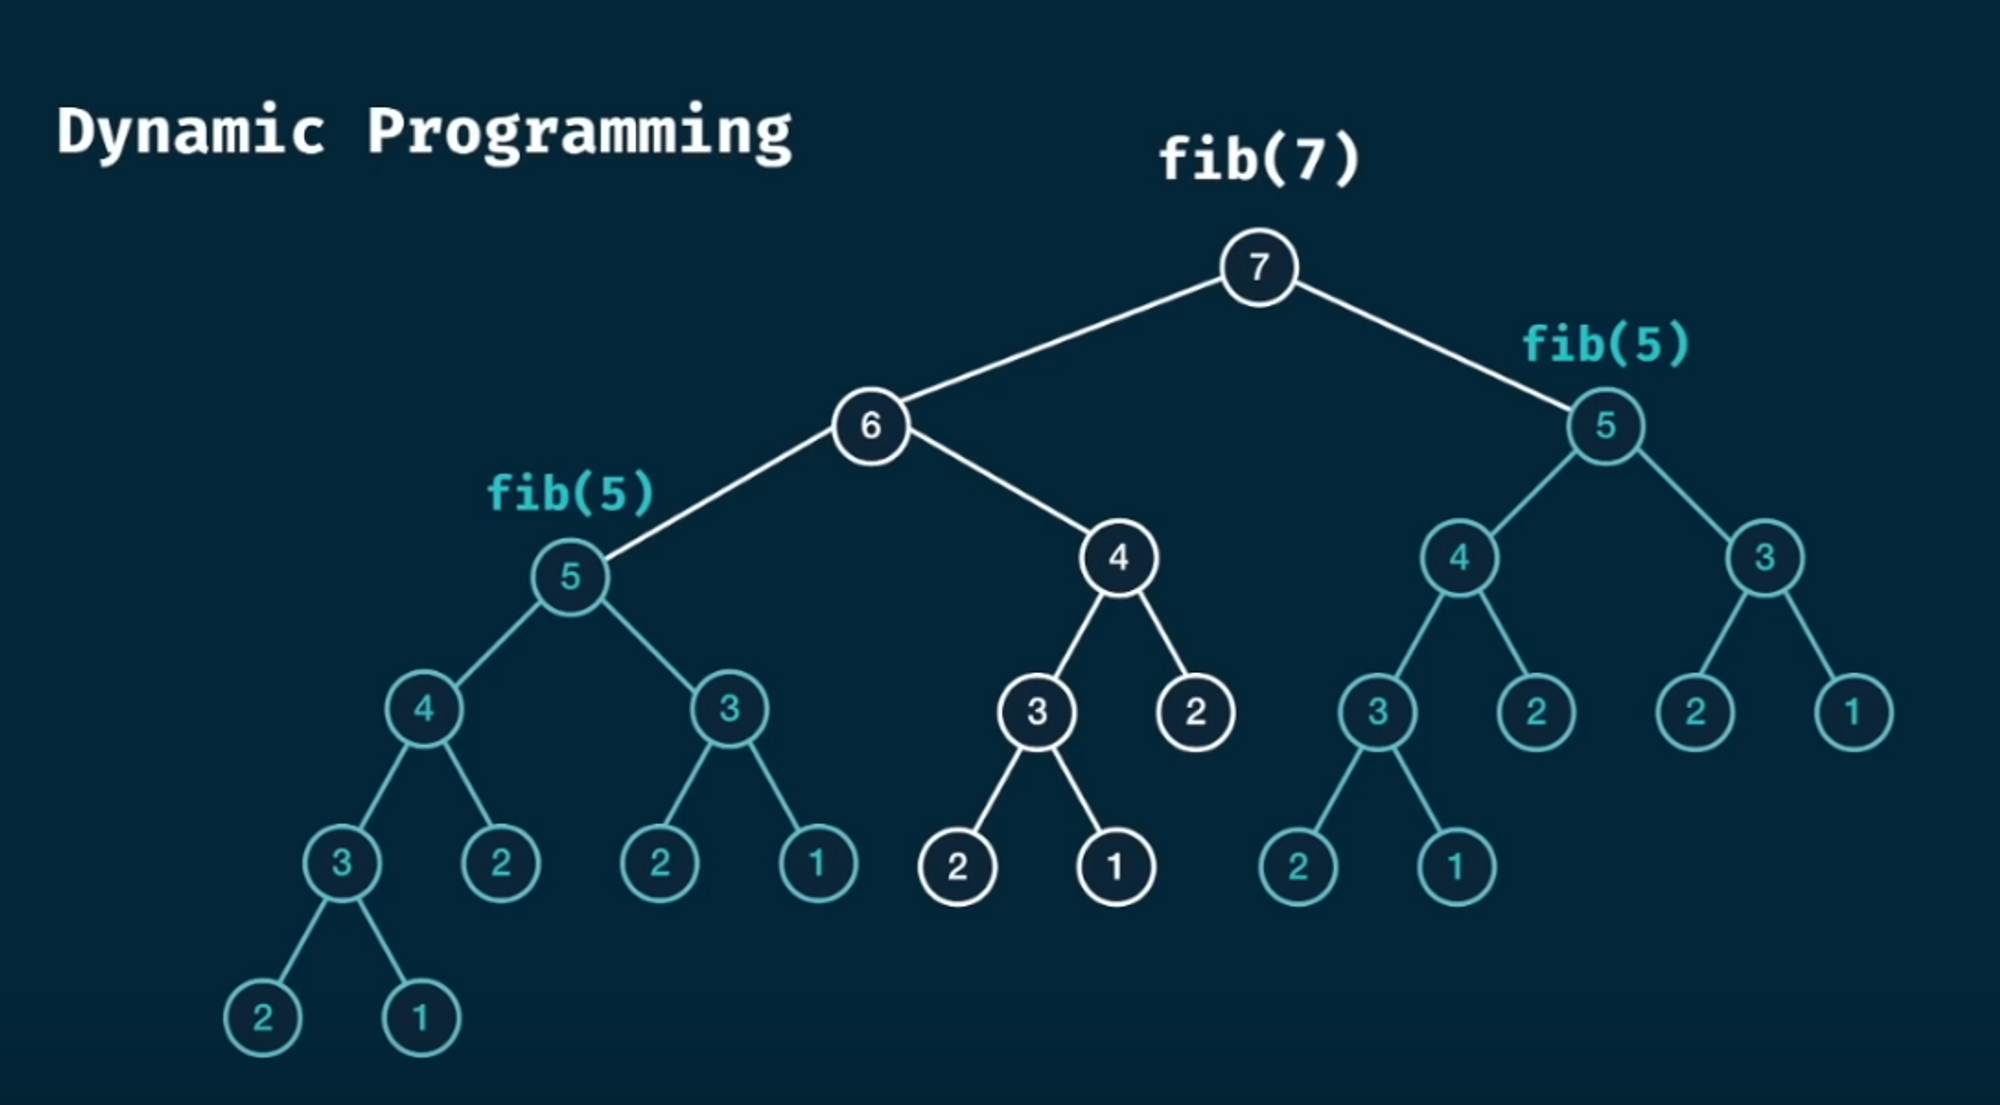

### Optimization Fibonnaci
When visualizing, we can see subtree repititons. If we were to save a subtree once it is calculated, we can use the saved tree for the repeating calculations to improve the speed.

Time complexity now is O(n)

In [28]:
# Memoization

def fib(n, memo={}):
    if n in memo:
        return memo[n]
    
    if n <= 2:
        return 1
    
    else:
        # Saving each subtree
        memo[n] = fib(n-1) + fib(n-2)
        return memo[n]
    
s = time()    
op = fib(40)
e = time()

print(f"{op}, time taken:{e-s}s")

102334155, time taken:4.100799560546875e-05s


On Visualizing

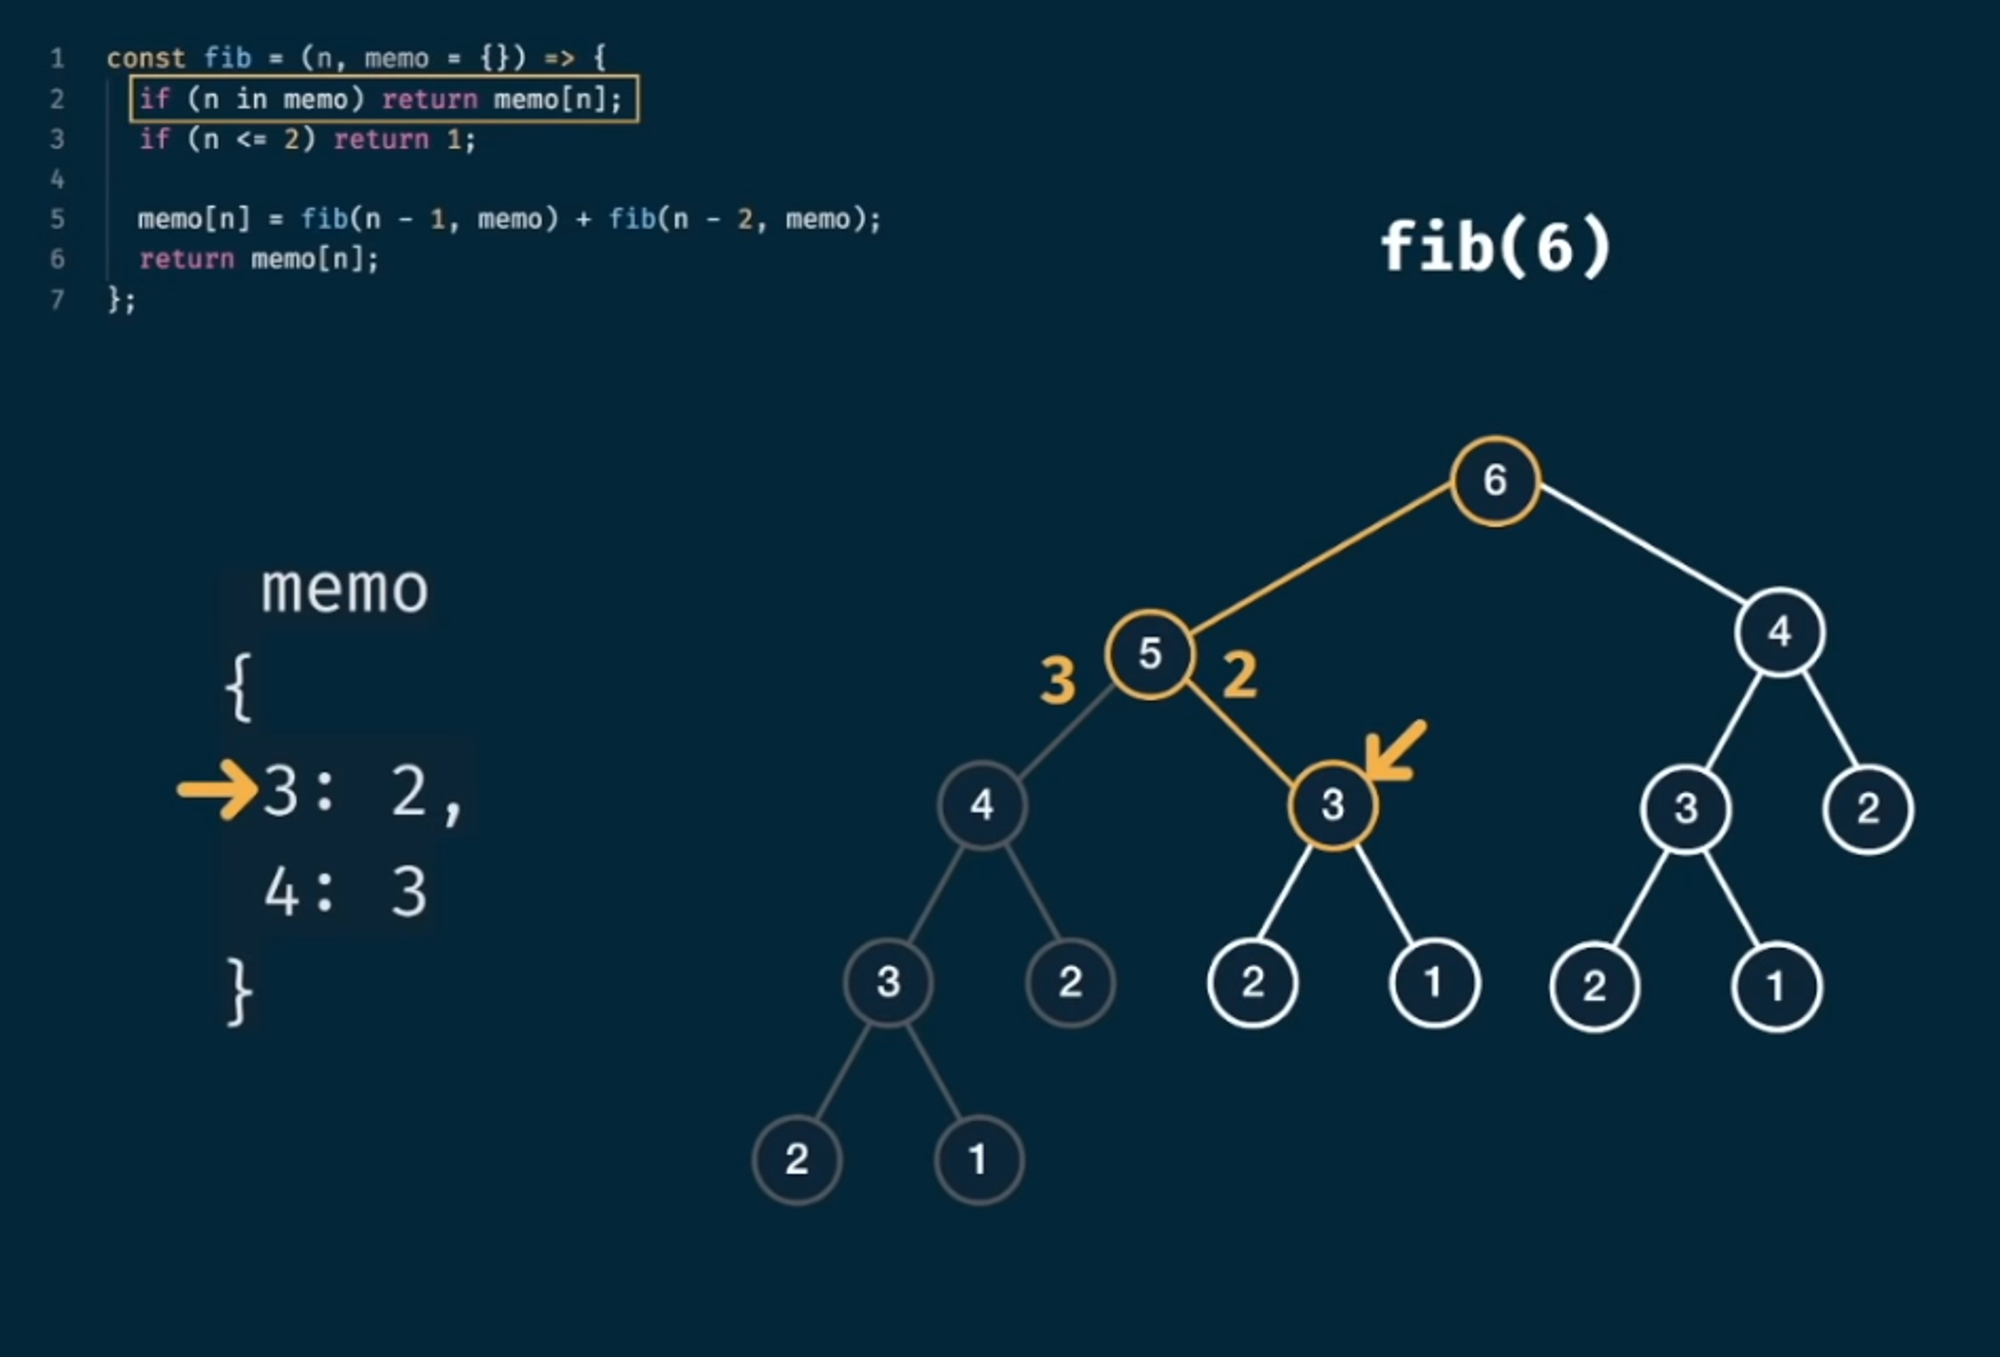

## Top Left to Bottom Right

Say that you are a traveler on a 2D grid. You begin in the top-left corner and your goal is to travel to the bottom-right corner. You may only move down or right.

In how many ways can you travel to the goal on a grid with dimensions m * n?

Write a function `gridTraveler(m, n)` that calculates this.

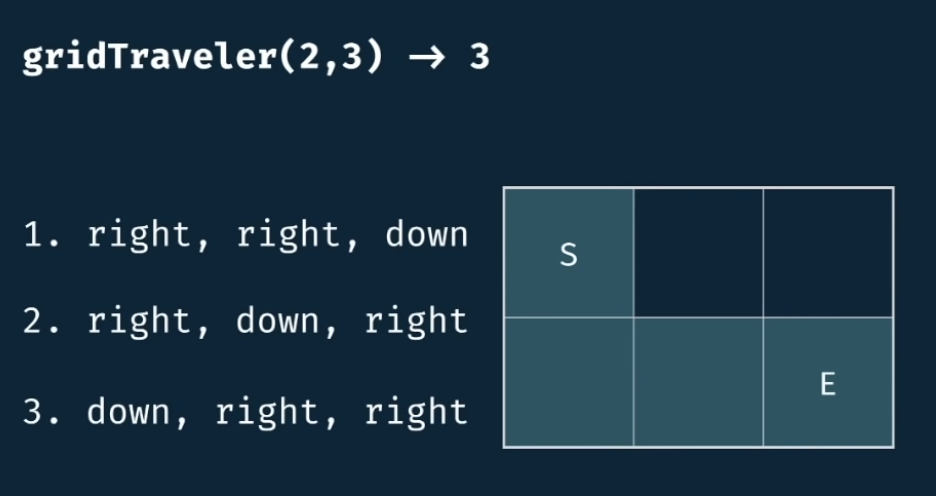

### Visualizing the Problem for (2,3)

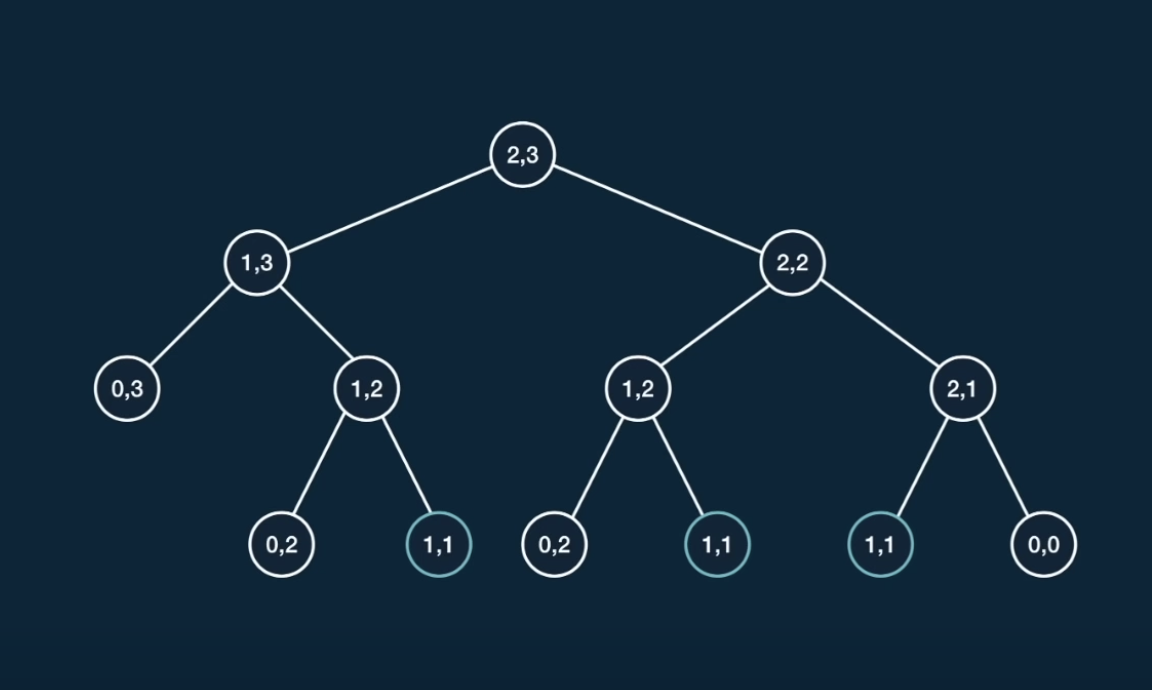

Having grid (1,1) is a base case because the O/P will be 1 (Start and End on same block). Having any dimension as 0 is also a base case as it then becomes 1D, therefore O/P is 0 again. Nodes with 1,1 or 0 in either dim become leaf nodes.

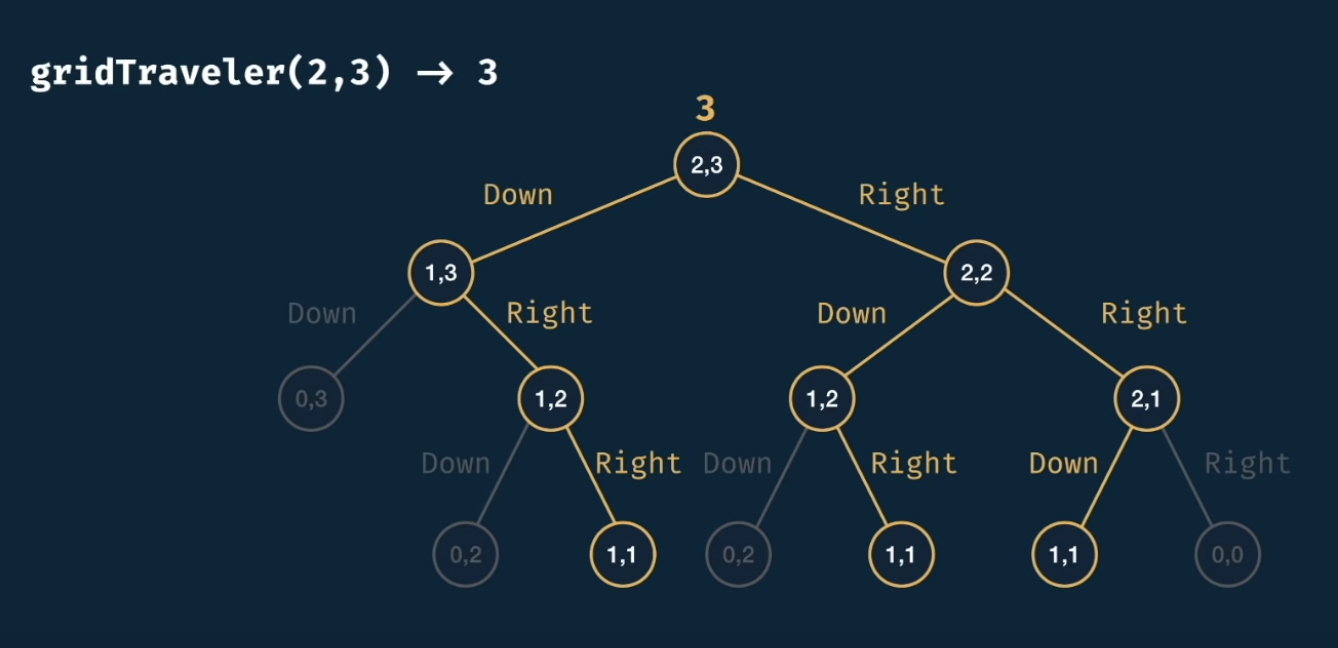

### Recursive Implementation

For each dimension, we are calculating the solutions to already solved grids again and again eg: 1,2 appears twice. Time complexity of O(2^n+m)

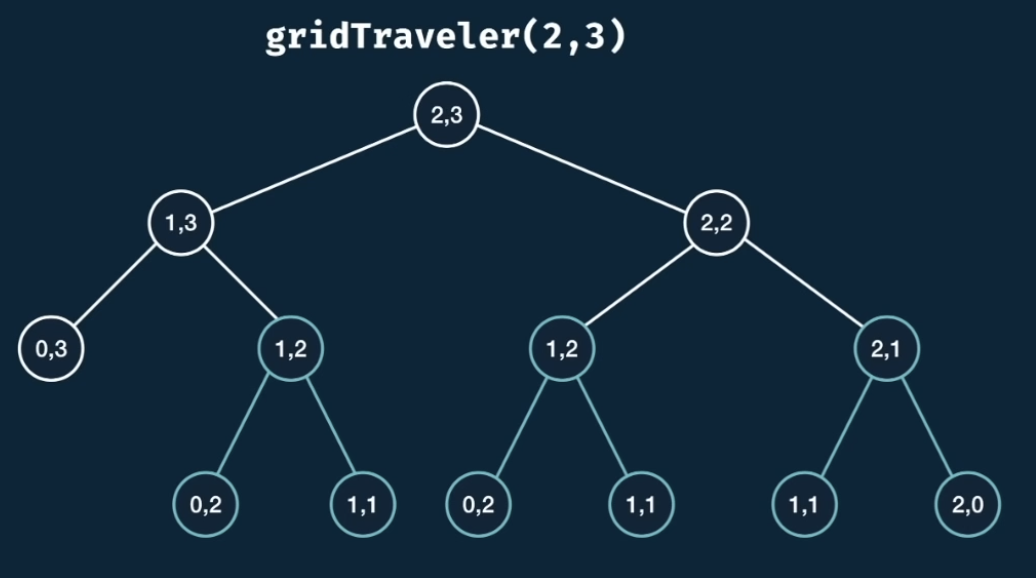

Also this problem is symmetric, 1,2 and 2,1 will give same O/P.

In [21]:
def gridTraveler(m, n):
    if m == 1 and n == 1:
        return 1
    
    if m == 0 or n == 0:
        return 0
    
    return gridTraveler(m - 1, n) + gridTraveler(m, n - 1)

s = time()
op = gridTraveler(m=15, n=15)
e = time()

print(f"{op}, time taken:{e-s}s")

40116600, time taken:8.650782823562622s


### Optimizing with Memoization

In [22]:
def gridTraveler(m, n, memo={}):
    # Making key using grid size.
    key = f"{m},{n}"
    
    if key in memo:
        return memo[key]
    
    if m == 1 and n == 1:
        return 1
    
    if m == 0 or n == 0:
        return 0
    
    # Storing solution for that m,n grid.
    memo[key] = gridTraveler(m - 1, n, memo) + gridTraveler(m, n - 1, memo)
    
    return memo[key]

s = time()
op = gridTraveler(m=15, n=15)
e = time()

print(f"{op}, time taken:{e-s}s")

40116600, time taken:0.00022983551025390625s


The new solution due it it calculating only the new grids has TIme Complexity of O(n*m).

## Memoization Strategy

1. Implement correct solution
    * Visualize problem as a tree
    * Implement tree using recursion
    * Test implementation, slow code with solution > wrong code

2. Make it efficient    
    * Add memo object
    * Add a base case to return memo values
    * Store return values into the memo

## CanSum Problem

Write a function "canSum(targetSum, numbers) that takes in a targetSum and an array of numbers as arguments. The function should return a boolean indicating whether or not it is possible to generate the targetSum using numbers from the array. You may use an element of the array as many times as needed. You may assume that all input numbers are nonnegative.

Write a function "canSum(targetSum, numbers) that takes in a targetSum and an array of numbers as arguments.
The function should return a boolean indicating whether or not it is possible to generate the targetSum using numbers from the array.
You may use an element of the array as many times as needed.
You may assume that all input numbers are nonnegative.

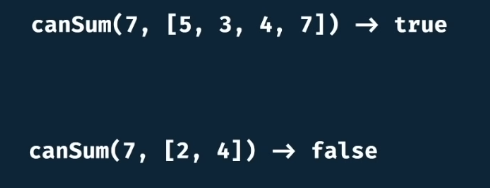

3 + 4 = 7

7 = 7

### Visualizing the problem

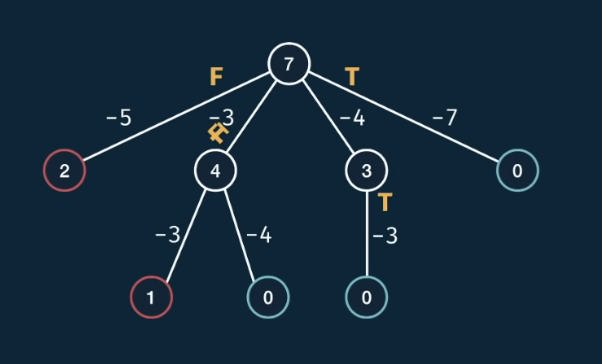

Base case => Nodes with 0

We just need at least 1 true (base case = 0) to return true

### Recursive Implementation

In [8]:
def canSum(targetSum, numbers):
    
    # Checking for a base case where target sum is obtained
    if targetSum == 0:
        return True
    
    # Early stopping to prevent negative calculations
    if targetSum < 0:
        return False
    
    # Recursive tree calculates all possible combinations
    for i in numbers:
        remainder = targetSum - i
        
        if canSum(remainder, numbers):
            return True
    
    return False

s = time()
op = canSum(250, [7, 14, 200, 50])
e = time()

print(f"{op}, time taken:{e-s}s")

True, time taken:11.556310892105103s


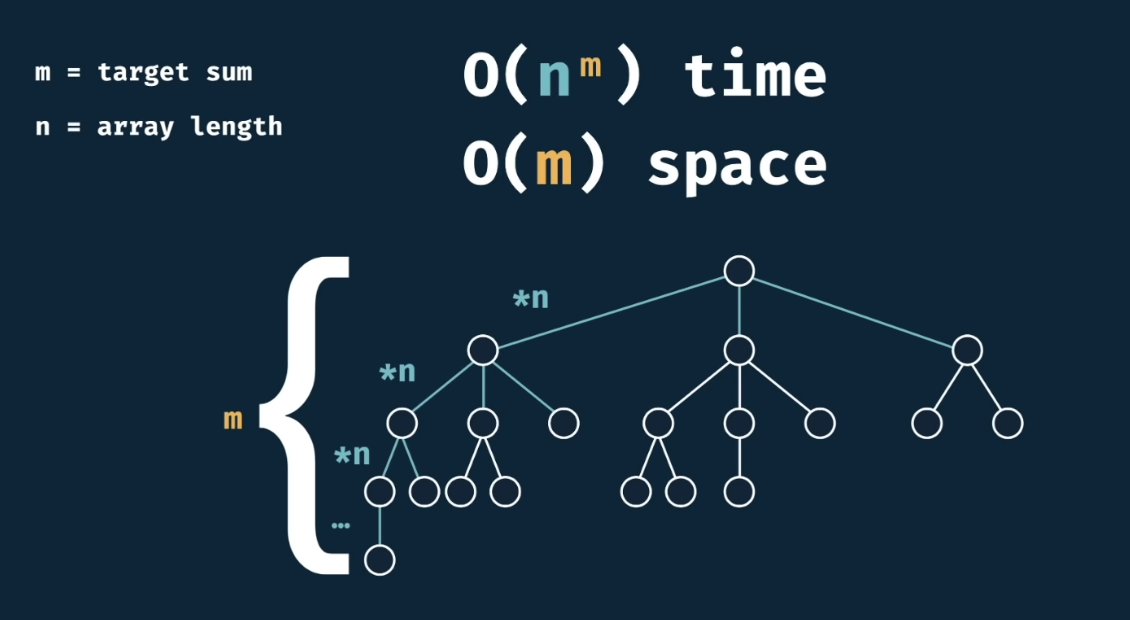

### Optimization

Eliminating the duplicate subtrees

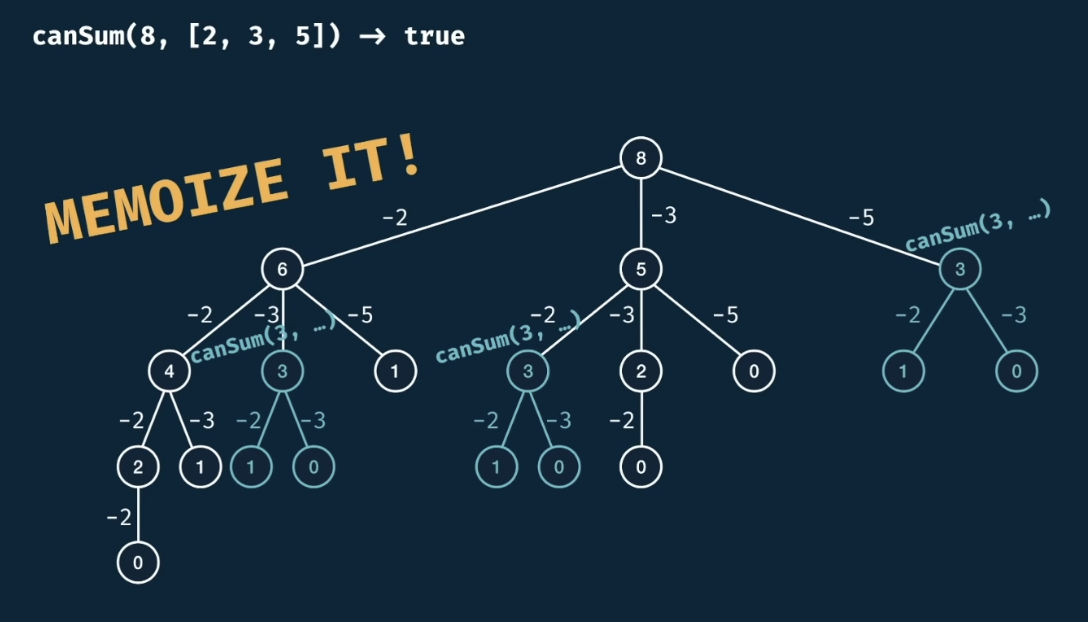

In [9]:
def canSum(targetSum, numbers, memo={}):
    
    # Checking if problem was already encountered
    if targetSum in memo:
        return memo[targetSum]
    
    # Checking for a base case where target sum is obtained
    if targetSum == 0:
        return True
    
    # Early stopping to prevent negative calculations
    if targetSum < 0:
        return False
    
    # Recursive tree calculates all possible combinations
    for i in numbers:
        remainder = targetSum - i
        
        if canSum(remainder, numbers, memo):
            memo[targetSum] = True
            return True
    
    memo[targetSum] = False
    return False

s = time()
op = canSum(250, [7, 14, 200, 50])
e = time()

print(f"{op}, time taken:{e-s}s")

True, time taken:7.009506225585938e-05s


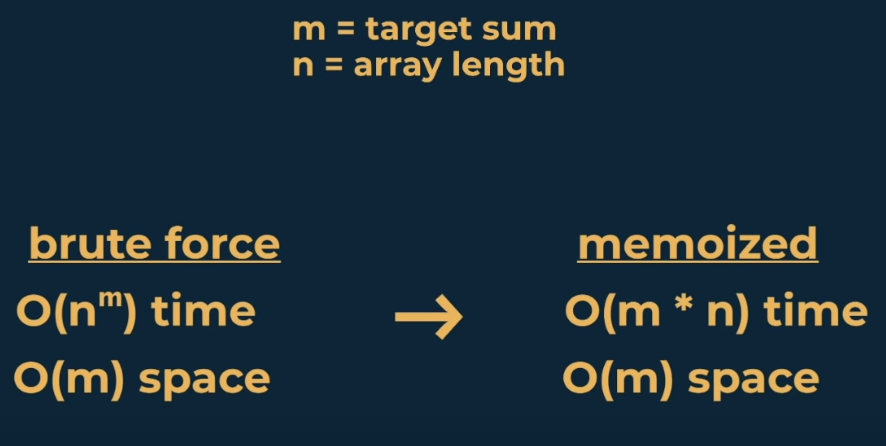